# Exercise 6.5 Unsupervised Machine Learning: Clustering 

# This script contains the following:

#### 01. Importing libraries and data and renaming columns
#### 02. The elbow technique
#### 03. k-means clustering

## 01 Importing Libraries, Data and Renaming Columns

In [6]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [7]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [10]:
# create path

path = r"C:\Users\kthav\My Pc\Desktop\Career Foundry\Sourcing Open Data\Final Project"

In [12]:
# import merged_clean.csv as df

df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'merged_clean.csv'), index_col = False)

In [14]:
df.shape

(782, 12)

In [16]:
df.head(10)

Unnamed: 0      Country                     Region  Happiness Rank  \
0           0  Switzerland             Western Europe               1   
1           1      Iceland             Western Europe               2   
2           2      Denmark             Western Europe               3   
3           3       Norway             Western Europe               4   
4           4       Canada              North America               5   
5           5      Finland             Western Europe               6   
6           6  Netherlands             Western Europe               7   
7           7       Sweden             Western Europe               8   
8           8  New Zealand  Australia and New Zealand               9   
9           9    Australia  Australia and New Zealand              10   

   Happiness Score  Economy (GDP per Capita)   Family  \
0            7.587                   1.39651  1.34951   
1            7.561                   1.30232  1.40223   
2            7.527                   1.32548  1.36058   
3            7.522                   1.45900  1.33095   
4            7.427                   1.32629  1.32261   
5            7.406                   1.29025  1.31826   
6            7.378                   1.32944  1.28017   
7            7.364                   1.33171  1.28907   
8            7.286                   1.25018  1.31967   
9            7.284                   1.33358  1.30923   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   
5                   0.88911  0.64169                        0.41372   
6                   0.89284  0.61576                        0.31814   
7                   0.91087  0.65980                        0.43844   
8                   0.90837  0.63938                        0.42922   
9                   0.93156  0.65124                        0.35637   

   Generosity  Year  
0     0.29678  2015  
1     0.43630  2015  
2     0.34139  2015  
3     0.34699  2015  
4     0.45811  2015  
5     0.23351  2015  
6     0.47610  2015  
7     0.36262  2015  
8     0.47501  2015  
9     0.43562  2015

In [18]:
df.dtypes

Unnamed: 0                         int64
Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Year                               int64
dtype: object

In [28]:
df.drop(columns = ['Unnamed: 0', 'Country', 'Region'], inplace = True)

In [30]:
df.columns

Index(['Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'Year'],
      dtype='object')

In [32]:
# rename columns

df.rename(columns={
    'Happiness Rank': 'H. Rank',
    'Happiness Score': 'H. Score',
    'Economy (GDP per Capita)': 'Economy',
    'Health (Life Expectancy)': 'Health',
    'Trust (Government Corruption)': 'Trust'
}, inplace=True)


In [34]:
df.columns

Index(['H. Rank', 'H. Score', 'Economy', 'Family', 'Health', 'Freedom',
       'Trust', 'Generosity', 'Year'],
      dtype='object')

## 02. The Elbow Technique

In [37]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [39]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-1597233.7540674962,
 -400711.32595081255,
 -179157.21183404722,
 -102359.87004137354,
 -66495.62933098282,
 -46715.06891811029,
 -34744.698095415035,
 -27866.839267280942,
 -23215.792174027483]

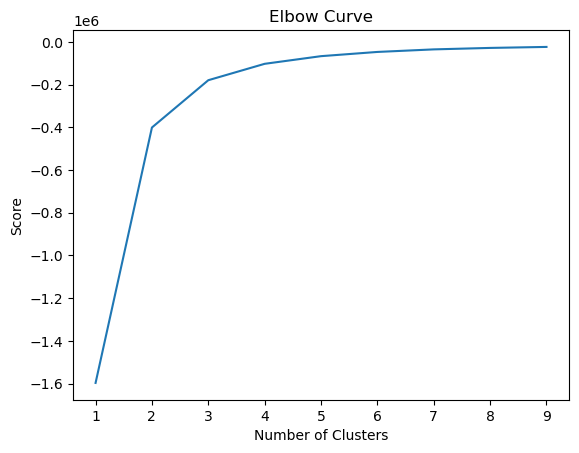

In [41]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

There is a big jump from 2 to 3 on the x-axis and then the curve flattens out. This means that the optimal number of clusters is 3.

# 03. K-Means Clustering

In [46]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [48]:
# Fit the k-means object to the data.

kmeans.fit(df)

KMeans(n_clusters=3)

In [50]:
df['clusters'] = kmeans.fit_predict(df)

In [52]:
df.head()

H. Rank  H. Score  Economy   Family   Health  Freedom    Trust  Generosity  \
0        1     7.587  1.39651  1.34951  0.94143  0.66557  0.41978     0.29678   
1        2     7.561  1.30232  1.40223  0.94784  0.62877  0.14145     0.43630   
2        3     7.527  1.32548  1.36058  0.87464  0.64938  0.48357     0.34139   
3        4     7.522  1.45900  1.33095  0.88521  0.66973  0.36503     0.34699   
4        5     7.427  1.32629  1.32261  0.90563  0.63297  0.32957     0.45811   

   Year  clusters  
0  2015         2  
1  2015         2  
2  2015         2  
3  2015         2  
4  2015         2

In [54]:
df['clusters'].value_counts()

clusters
1    267
0    260
2    255
Name: count, dtype: int64

In [58]:
# Check the unique cluster labels
print(df['clusters'].unique())  

[2 0 1]


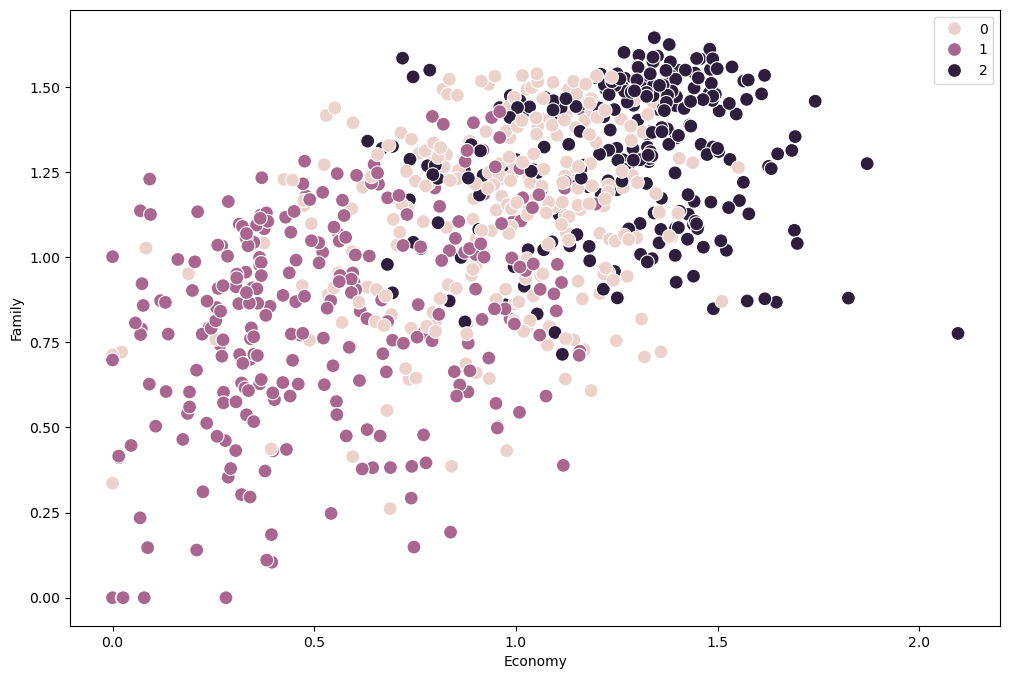

In [56]:
# Plot the clusters for the "Economy" and "Family" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Economy'], y=df['Family'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Economy') # Label x-axis.
plt.ylabel('Family') # Label y-axis.
plt.show()

This graph shows that countries with stronger economies tend to have higher family well-being. The countries on the top right seem to have both solid economic foundations and strong family support (Cluster 0, dark purple), while those in the bottom left struggle in both areas (Cluster 2, purple). The middle group (Cluster 1, pink) has a mix of countries with moderate levels of both economy and family well-being. It’s clear that a strong economy might contribute to stronger family support systems.

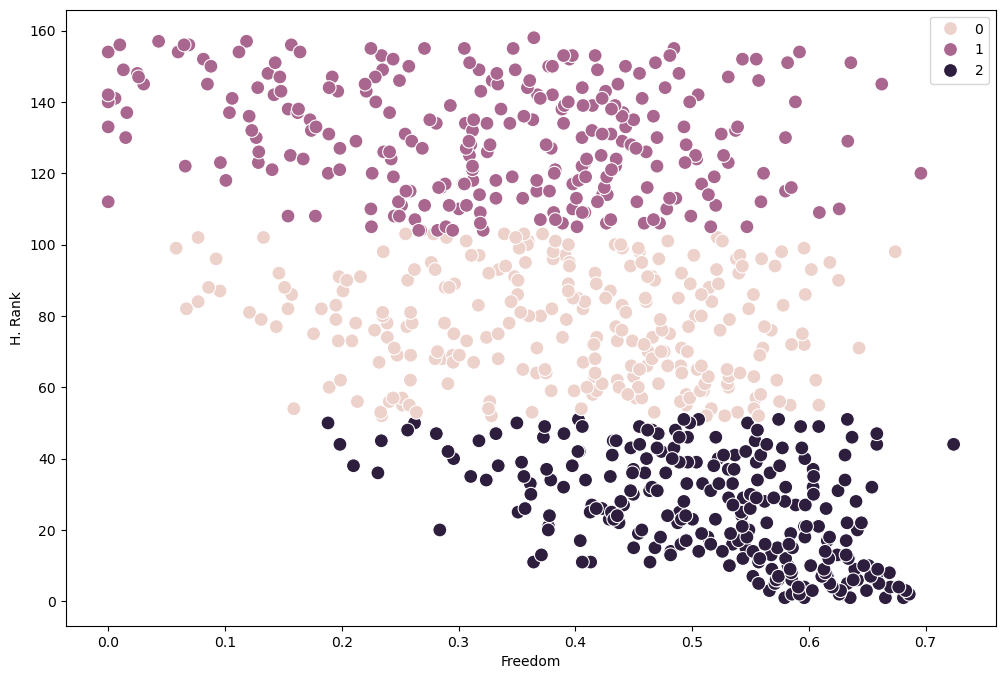

In [82]:
# Plot the clusters for the "Freedom" and "H. Rank" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Freedom'], y=df['H. Rank'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Freedom') # Label x-axis.
plt.ylabel('H. Rank') # Label y-axis.
plt.show()

This graph suggests a strong connection between happiness and freedom. Countries on the left, with high happiness (lower ranks), also tend to have higher levels of perceived freedom (Cluster 0, dark purple). In the middle (Cluster 1, pink), there’s a mix of countries with moderate levels of happiness and freedom. On the right, countries with low happiness (higher ranks) often have limited freedom (Cluster 2, purple). It’s clear that freedom is an important factor in happiness, but the spread within the clusters hints at other contributing elements.

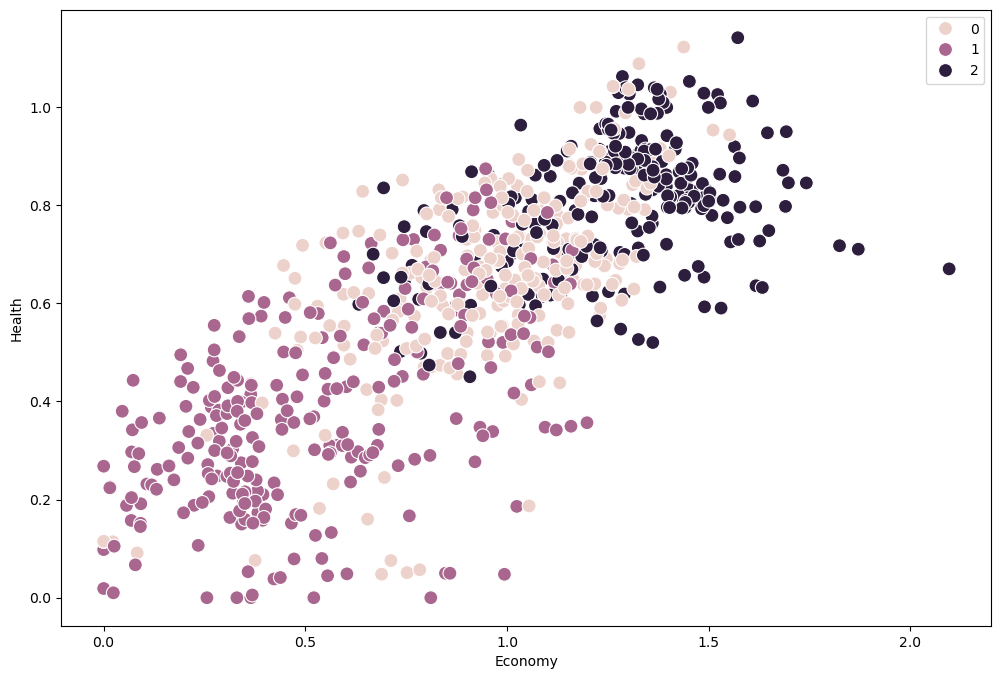

In [87]:
# Plot the clusters for the "Economy" and "Health" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Economy'], y=df['Health'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Economy') # Label x-axis.
plt.ylabel('Health') # Label y-axis.
plt.show()

The link between economic strength and health outcomes is clear here. Countries on the upper right are doing well in both areas (Cluster 0, dark purple), while those on the lower left are struggling (Cluster 2, purple). The middle group (Cluster 1, pink) shows a wide range of health outcomes, even among countries with similar economic strength. This suggests that while the economy plays a big role in health, there may be other factors at play too.



In [74]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [78]:
df.groupby('cluster').agg({'Economy':['mean', 'median'], 
                         'Family':['mean', 'median'], 
                         'Health':['mean', 'median'],
                          'Trust':['mean', 'median'],
                         'Generosity':['mean', 'median'],
                         'Freedom':['mean', 'median']})

Economy              Family              Health            \
                 mean    median      mean    median      mean    median   
cluster                                                                   
dark purple  1.270991  1.309150  1.301916  1.323110  0.805980  0.817000   
pink         0.958871  0.999365  1.122116  1.160919  0.654627  0.664445   
purple       0.535356  0.476180  0.822338  0.858000  0.386445  0.363150   

                Trust           Generosity             Freedom            
                 mean    median       mean    median      mean    median  
cluster                                                                   
dark purple  0.187978  0.150000   0.248551  0.242400  0.516409  0.539771  
pink         0.088481  0.072988   0.190212  0.182425  0.390707  0.409079  
purple       0.101640  0.085000   0.217568  0.201870  0.330355  0.346000

##### Summary of the Summary Statistics
Cluster 0 (dark purple) represents the most well-off countries across all dimensions. These nations have strong economies, high levels of family and social support, and excellent health outcomes. With high levels of perceived freedom and trust in governance, they also show greater generosity compared to the other clusters. This group reflects well-developed, high-income countries with strong institutions and overall well-being.

Cluster 1 (pink) represents middle-income countries that sit between the extremes of high and low well-being. These nations have moderate economies, family support, and health outcomes. However, freedom and trust levels are significantly lower compared to Cluster 0, with trust being particularly low. There’s also more variability within this group, suggesting diverse challenges that different countries in this cluster face. While they are doing relatively well in some areas, there is room for improvement, especially in governance and social cohesion.

Cluster 2 (purple) represents countries facing significant challenges. These nations have weak economies, lower family and social support, and poor health outcomes. Freedom is limited, and trust in government is extremely low, indicating systemic issues like corruption or ineffective governance. Despite these challenges, generosity levels are relatively comparable to Cluster 1, possibly reflecting cultural or community-driven support systems. Overall, this cluster reflects countries in need of substantial development across multiple dimensions to improve well-being.

##### How These Results Can Be Useful
Guiding Policy Decisions:
The clusters highlight different needs for each group of countries, helping policymakers focus on what matters most. For instance, countries in Cluster 2 can prioritize improving healthcare and strengthening their economies, while Cluster 1 might focus on building trust in governance and addressing inequalities. Cluster 0 countries can act as examples of what strong systems and support can achieve.

Predicting Impacts:
The connections between variables like economy, health, and happiness can be used to predict how changes in one area might affect others. For example, increasing economic strength might lead to better health outcomes. This kind of analysis helps in planning actions that make the biggest difference.

Tracking Progress Over Time:
These clusters create a baseline for comparing countries and monitoring their progress. By revisiting the data, we can see which countries are improving and how interventions are working.

Understanding Regional Patterns:
The results can help uncover how cultural or regional differences influence factors like trust or generosity. This deeper understanding can lead to more personalized solutions for specific regions or groups of countries.

Improving Future Analysis:
These findings can be the foundation for adding more data, such as education or environmental factors, to better understand what drives happiness and well-being. It allows for more refined and meaningful insights.